# Homework 2 Regression Refresher

In class, we considered a very simply algorithm called gradient descent that we used to estimate the parameters of a simple linear model. But we left many considerations open. These include:
- Normalization 
    - We saw that the SSE is a very big number in our example, leading us to choose awkwardly small learning rates. Normaling the error may help us use more reasonably sized learning rates.
- When to stop
    - We can tell the algorithm to stop after a set number of iterations or, something smarter, tell it to stop when it begins to take very small step sizes
- Multiple solutions
    - It should be obvious that gradient descent, as an algorithm, doesn't do much "thinking". 
    - If there are multiple solutions, it will only find one


**Tracey Moyston**
**I worked alone on this problem set**

## Problem 1 - Use gradient descent to identify multiple minima

Regression algorithms ultimately search for minima. This can be where an error function is minimized (as we saw in class) or when a polynomial equation is minimized. Using the code from our lecture, adapt the code in order to indentify the roots of the following equation: 

$x^3 - 6x^2 +11x = 6$
  
- Look at homework 1 for how to tackle this problem.
- Since the polynomial will have more than 1 solution, be sure to consider multiple starting guesses. 
- Use the "roots" function from numpy to check your answer. Roots is especially designed for polynomials and should find all roots.

In [136]:
#using the gradient descent algorithm developed from class to find the roots for a cubic polynomial 

import numpy as np #importing the necessary packages for the code
import matplotlib.pyplot as plt 


#for the polynomial x^3-6x^2+11x=6 defining the function that accepts an input for x and evaluates the polynomial
def roots(x): 
    y=x**3-6*x**2+11*x-6; # polynomial to be evaluated for guesses of x 
    err=y-0; #at the root y=0, this calculates the difference between the guess and y at the root 
    SSE=np.sum(err**2); #sum of the square of the error calculated above 
    return SSE; #function returns the sum of the squared error 

#function accepts guesses of x and finds the derivative (used as scaling factor in the gradient descent)
def scale(x):
    DERIVATIVE = (roots(x+0.01)-roots(x))/0.01; 
    return DERIVATIVE

guesses=list(range(0,10,1)) #list of initial guesses from 1-9 wiht a step size of 1 
newguess=[guesses[i] for i in range(0,len(guesses)) if abs(scale(guesses[i]))<0.1] #creates a list of the guesses 
#that have a derivative magnitude of less than zero. These will be the initial guesses for the gradient descent

rate = 0.1; #set the rate of scaling for new x to 0.1

for i in range(0,len(newguess)): #iterating over the list of new guesses 
    current_x=newguess[i] #sets the current x to the initial guess from the list
    n=0;
    while n<100: #loop runs while the iterator is less than 100 
        new_x = current_x - rate *scale(current_x) ; #finds a new value of x with each loop 
        current_x=new_x;
        n = n + 1;
    print("Our best value for our slope (root) is ", new_x, " with SSE", derivative(new_x))


print('the actual roots of the polynomial are',np.roots([1,-6,11,-6])) #finds the actual roots of the polynomial 

Our best value for our slope (root) is  0.9950375007031517  with SSE 2.0298488749789048
Our best value for our slope (root) is  1.9950000000010213  with SSE -0.9999250000000295
Our best value for our slope (root) is  2.9949624992968484  with SSE 1.9698511250210942
the actual roots of the polynomial are [3. 2. 1.]


## Problem 2 - Linear regression can be used to analyze "groups"

In class, we used linear regression to fit a linear model to height and weight data. In this case, the measurements (x) and the outcomes (y) are continuous. Linear regression is also commonly used to analyze groups, wherein the measurements are not continous. For example, we may have measured the height of persons who did or did not eat asparagus when they were young. In this case, x is discrete - a collection of 1's and 0's. 

Let's use linear regression to analyze the miles per gallon achieved by select type of cars. Download the data from https://gist.github.com/noamross/e5d3e859aa0c794be10b. We want to determine if 8 cylinder vehicles get less gas mileage than 4 and 6 cylinder cars. Cyl = cylinders; MPG = miles per gallon on the table.

### a) Write the code to determine the average MPG for 8 cylinder vehicles vs 4/6 cyl vehicle.
Be sure the mean values are clearly identified or report them in a new markup cell below the code. Be sure that you are treating 4 and 6 cyl vehicles as one group.

In [142]:
#finding whether 8 cylinder vehicles get less gas milage than 4 and 6 cylinders from data in a csv file

import pandas as pd #imports the pandas package 

datafile=pd.read_csv('cars.csv') #reads into the csv file and saves the data in this notebook 
dat=datafile.iloc[:,1:3] #from the csv data, extracts the 'mpg' and 'cyl' columns and all their rows

#defines empty lists to add data to 
eightcyl=[]; #for 8 cylinder mpg data 
six_fourcyl=[]; #for 6/4 cylinder mpg data 

for i in range(0,len(dat)): #iterates over the number of rows in the datafile 
    if dat.iloc[i,1]==8: #if the number in the cylinder column is 8 then the mpg is added to the list for 8 cylinder
        eightcyl.append(dat.iloc[i,0])
    if dat.iloc[i,1]==6 or dat.iloc[i,1]==4: #if the number in the cylinder column is 4 or 6 then the mpg is added to
                                             #the list for 4/6 cylinders 
        six_fourcyl.append(dat.iloc[i,0])

#finds the mean of the mpg values in each respective list 
print ('mean mpg for 8 cyl is',np.mean(eightcyl)) 
print ('mean mpg for 6/4 cyl is',np.mean(six_fourcyl))




mean mpg for 8 cyl is 15.1
mean mpg for 6/4 cyl is 23.972222222222218


The mean mpg for the 8 cylinder vehicles is 15.1 and for the 6/4 cylinder vehicles is 23.972

### b) Analyze using linear regression
To analyze with linear regression, we have to create a linear model. Here, our y is the MPG. But x is not a continous variable - it's a group variable. 

- Let's create a "Group" column in our data, where a 1 indicates that a vehicle has a 8 cyl engine and a 0 to indicate a 4 or 6 cylinder vehicle. 
- Use the linear regression **mathematical code** (do not use packages; perform the matrix algrebra) from class to calculate the slope and intercept. Feel free to check your answer using on the packages demonstrated in class.
- Report the slope and intercept in a text box below your code. 
- In the text box, also compare the calculated slope and intercept to the values of the means calculated above. Do you notice any obvious relationships?



Our intercept is  23.97222222222222 and our slope is -8.872222222222222


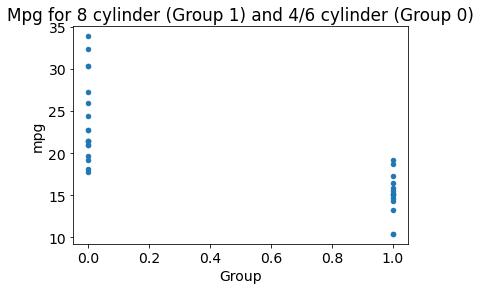

In [141]:
dat=pd.DataFrame(dat) #restructures the data as a dataframe to add in a new column 
newdata=[]; #creates an empty list to add in the data for the new column

for i in range (0,len(dat)): #iterates over the number of rows of the datafiles 
    if dat.iloc[i,1]==8: #if the number in the cylinder column is 8 then the number 1 is added to the list defined above
        newdata.append(1)
    else: #if it is not 8 then the number 0 is added 
        newdata.append(0)
dat["Group"]=newdata #creates a new column 'Group' in the dataframe and adds the values from the list to it 



dat.plot(x='Group',y='mpg',kind='scatter') #plots the mpg for the two groups 
plt.title('Mpg for 8 cylinder (Group 1) and 4/6 cylinder (Group 0)')

#sets up the matrix for calculating the slope and the intercept 
X = np.c_[np.ones(len(dat)),dat.iloc[:,2]] #the intercept column is 1s for the length of the datafile and the other 
#column represents the values for the groups 

from numpy.linalg import inv #package to manipulate the matrix 
tmp = inv(np.matmul(np.transpose(X),X)) #(X^T X)^-1

INTERCEPT, SLOPE = tmp @ np.transpose(X) @ dat.iloc[:,0] #finds the intercept and the slope B=(X^T X)^-1 X^T y 
#where y is the mpg 
print("Our intercept is ",INTERCEPT, "and our slope is", SLOPE)



The slope is -8.8722 and the intercept was found to be 23.972. The slope appears to be the difference between the mean of the 6/4 cylinder group and the 8 cylinder group. The intercept also appears to be the same as the 6/4 cylinder group mean. From this information it may be suggested that the 8 group cylinder vehicles have less average gas mileage than 6 and 4 cylinder vehicles 

In [14]:
#double checking the answer using a package 
import statsmodels.api as sm
model = sm.OLS(dat.iloc[:,0], sm.add_constant(dat.iloc[:,2])).fit()
 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     36.74
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           1.17e-06
Time:                        14:56:25   Log-Likelihood:                -89.584
No. Observations:                  32   AIC:                             183.2
Df Residuals:                      30   BIC:                             186.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9722      0.968     24.761      0.0